# Importing Dataset

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

df = pd.read_csv("diabetes_data_upload.csv")
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


# Data Inspection

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [3]:
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [4]:
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

Wall time: 149 ms


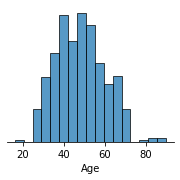

In [5]:
%%time
sns.pairplot(df, corner=True);

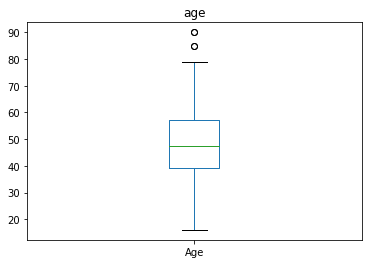

In [6]:
df.Age.plot.box(title='age');

In [7]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

Wall time: 0 ns


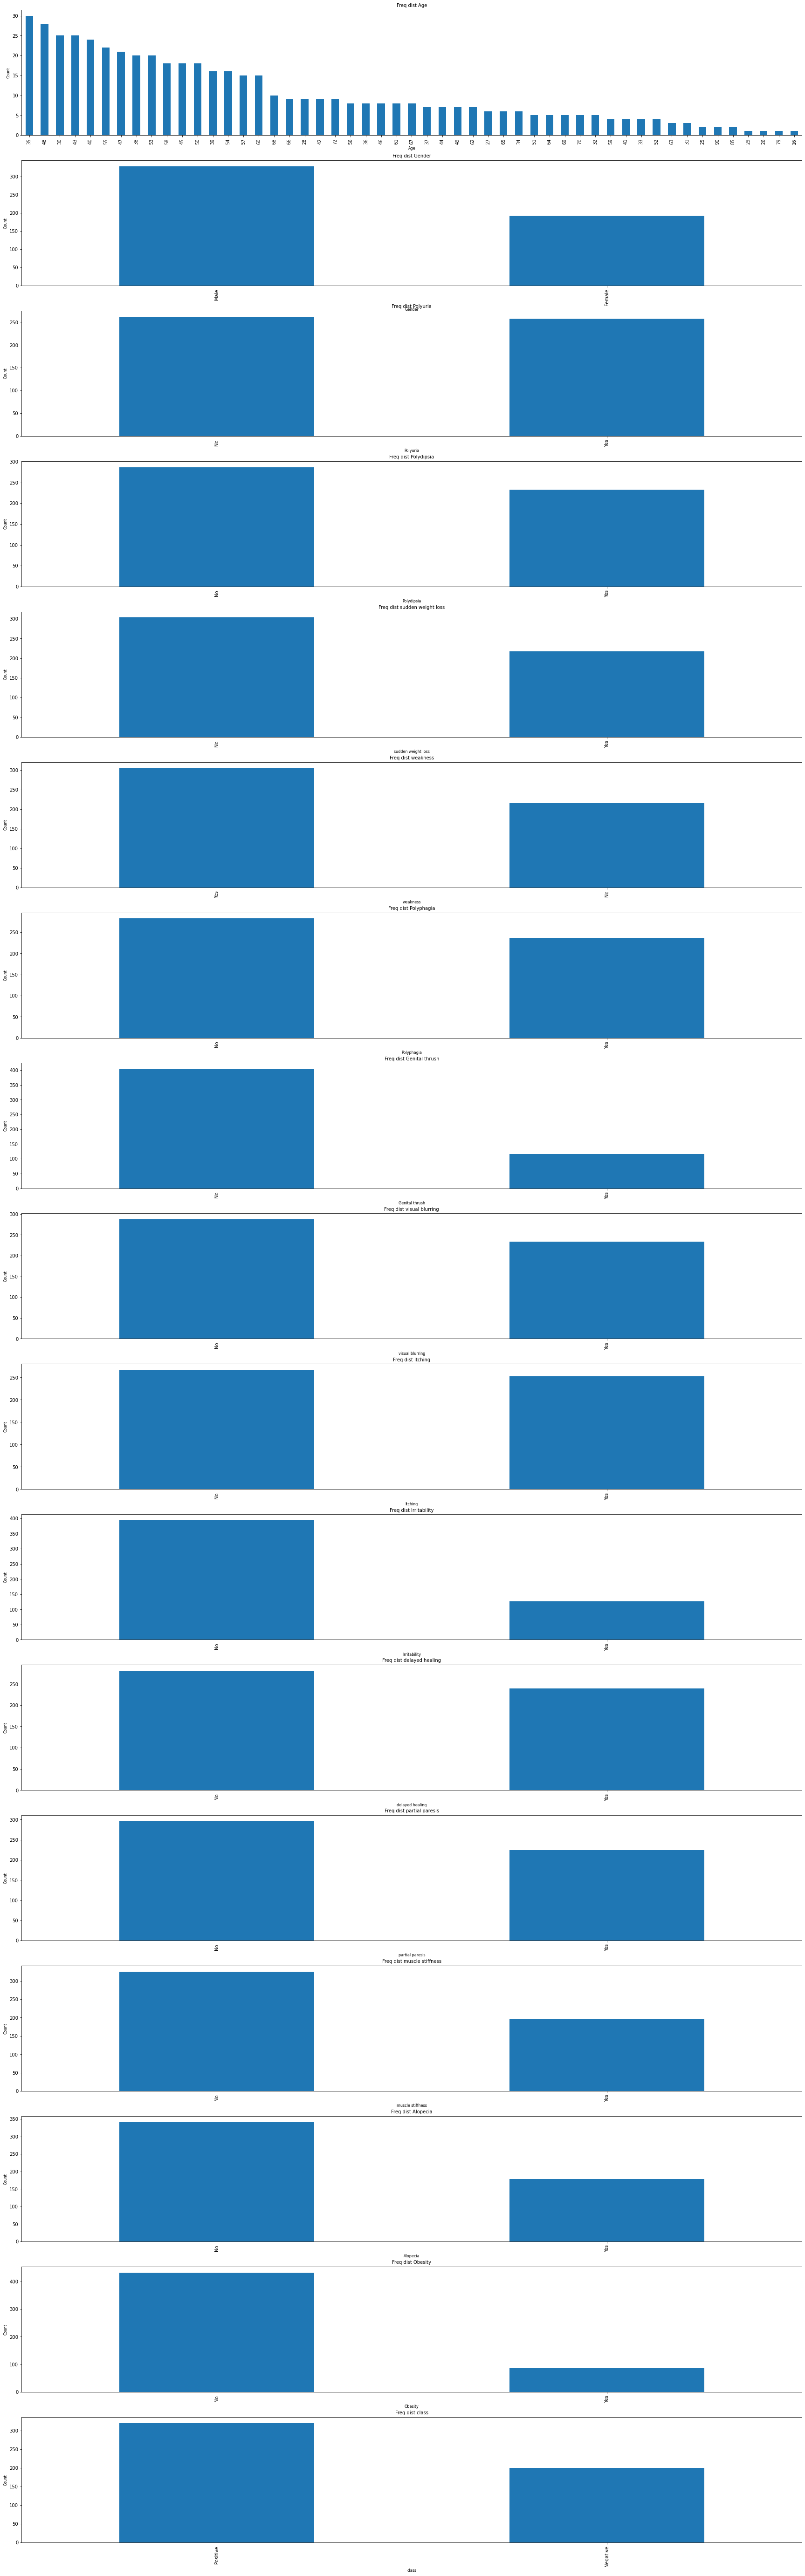

In [8]:
%time
col_names = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']

fig, ax = plt.subplots(len(col_names), figsize=(30,100))

for i, col_val in enumerate(col_names):

    df[col_val].value_counts(ascending=False).plot.bar(ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show();

Wall time: 0 ns


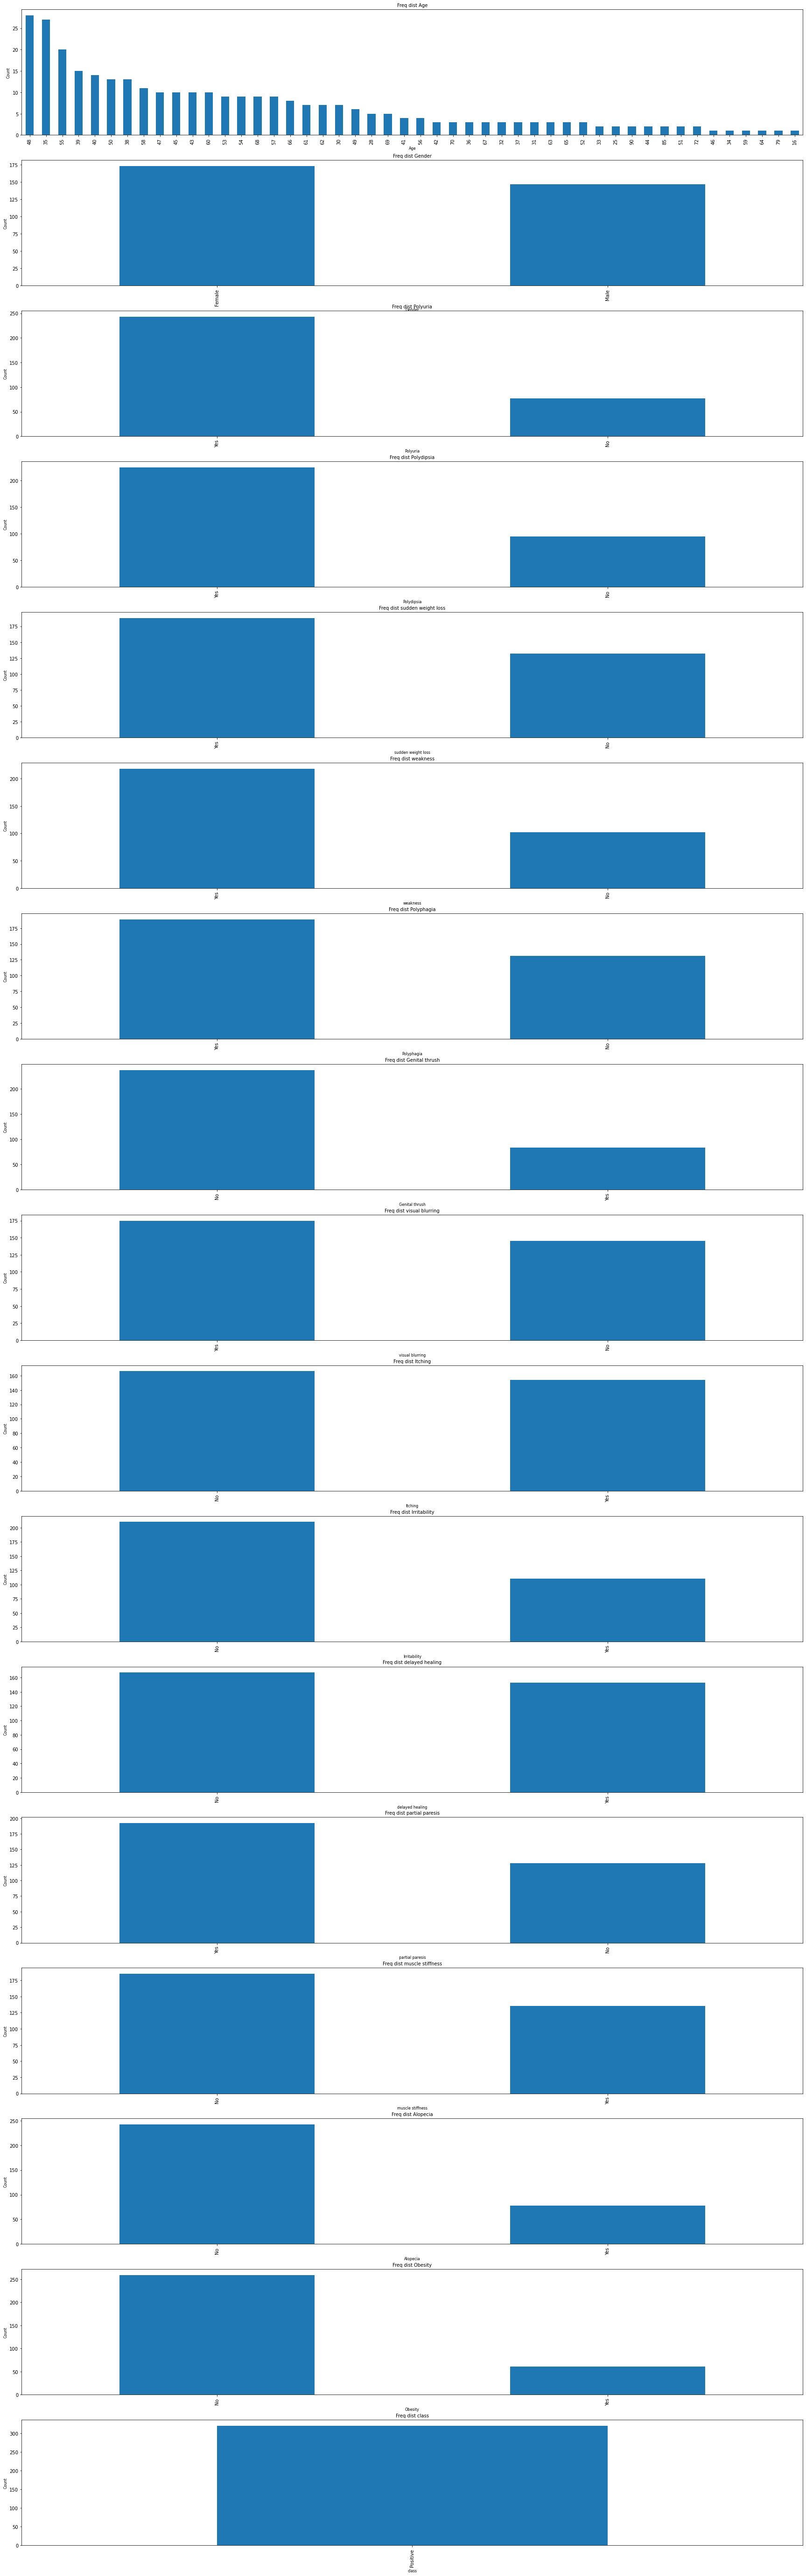

In [9]:
%time
col_names = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']

fig, ax = plt.subplots(len(col_names), figsize=(30,100))

for i, col_val in enumerate(col_names):

    df[df['class']=='Positive'][col_val].value_counts(ascending=False).plot.bar(ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show();

Wall time: 0 ns


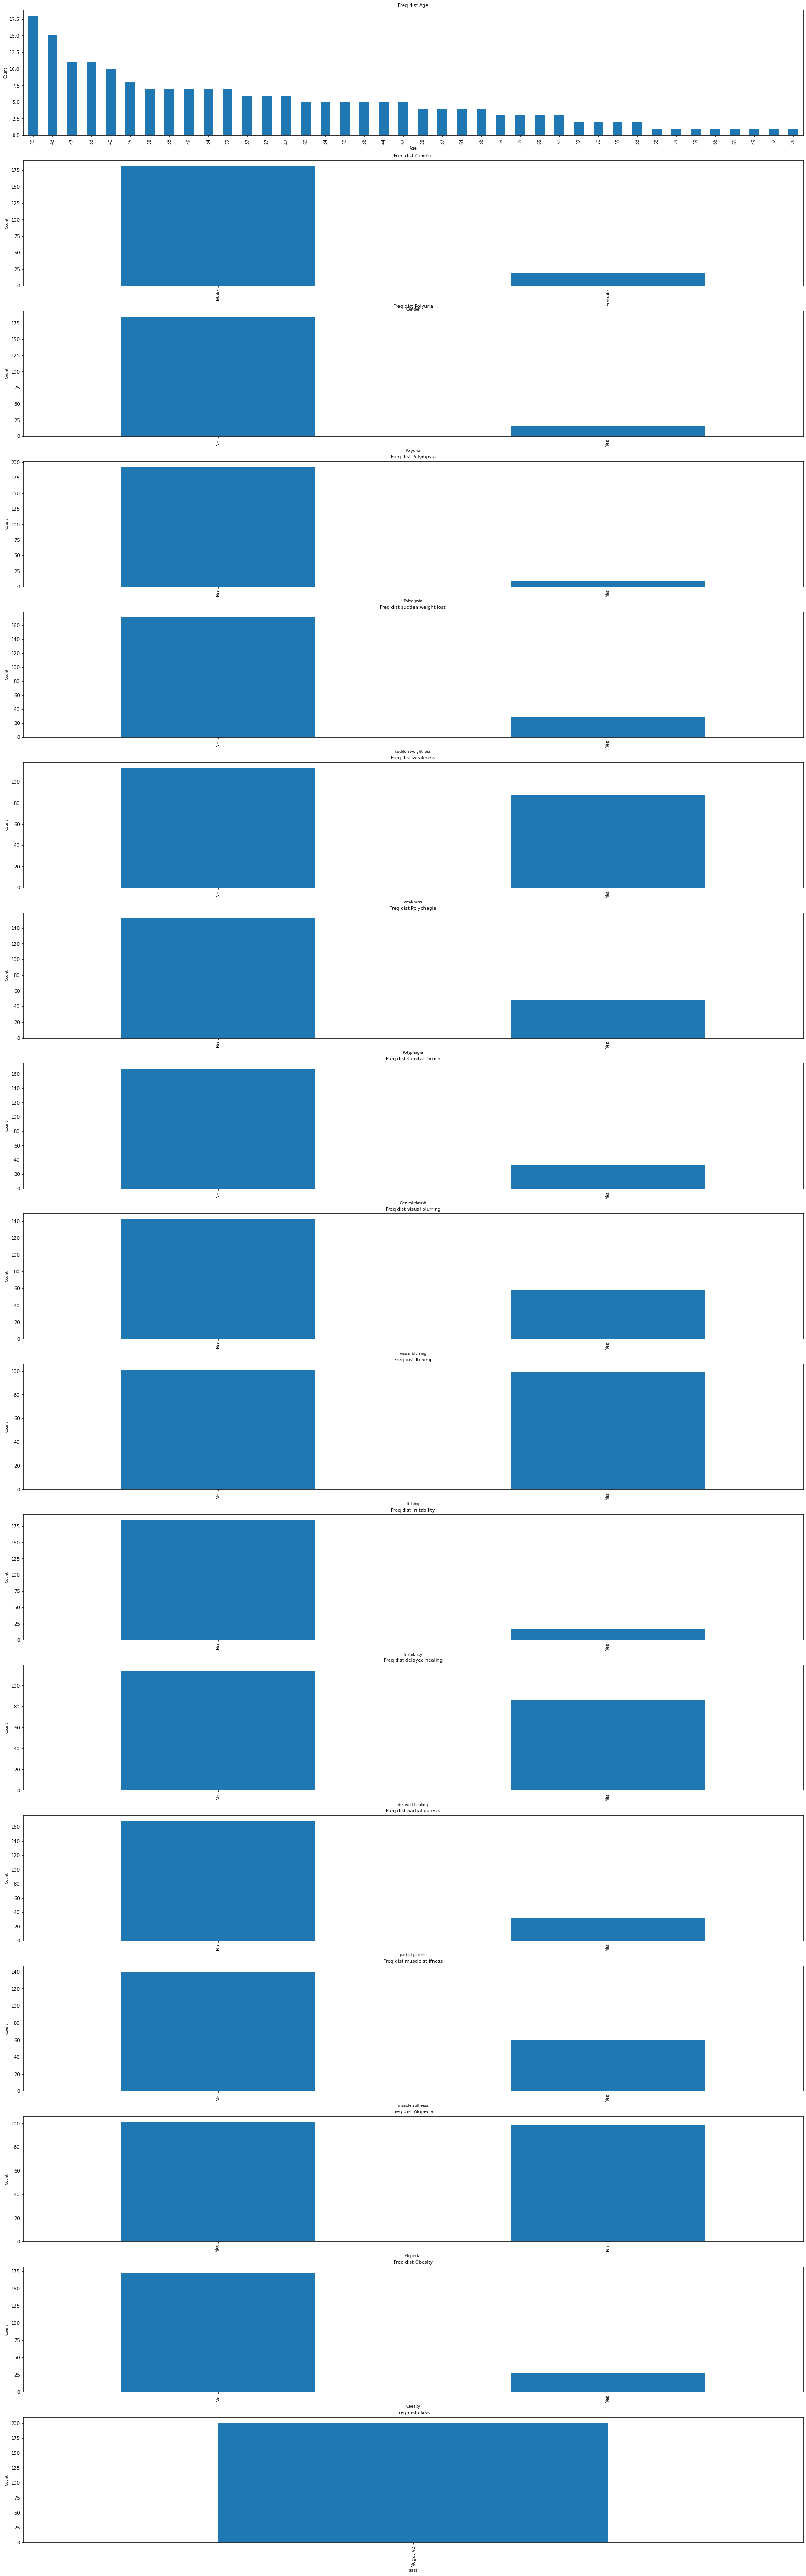

In [10]:
%time
col_names = ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class']

fig, ax = plt.subplots(len(col_names), figsize=(30,100))

for i, col_val in enumerate(col_names):

    df[df['class']=='Negative'][col_val].value_counts(ascending=False).plot.bar(ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show();

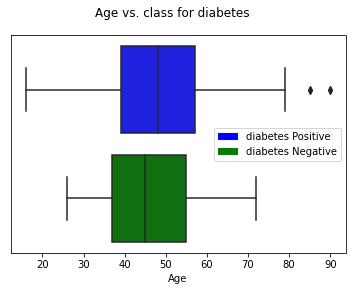

In [11]:
from matplotlib.patches import Patch
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="class", data=df,
            orient="h", palette={"Positive":"blue", "Negative":"green"}, ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. class for diabetes")

color_patches = [
    Patch(facecolor="blue", label="diabetes Positive"),
    Patch(facecolor="green", label="diabetes Negative")
]
ax.legend(handles=color_patches);

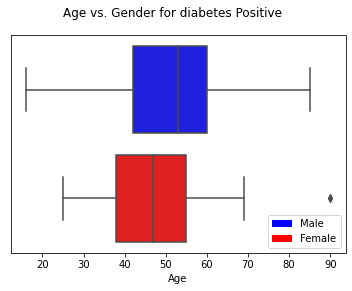

In [12]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Gender", data=df[df['class']=='Positive'],
            orient="h", palette={"Male":"blue", "Female":"red"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Gender for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Male"),
    Patch(facecolor="red", label="Female")
]
ax.legend(handles=color_patches);

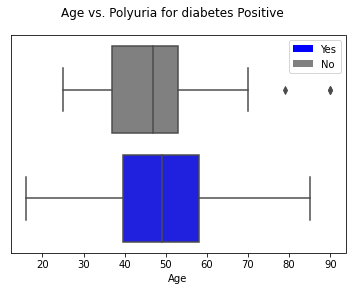

In [13]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Polyuria",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Polyuria for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="Grey", label="No")
]
ax.legend(handles=color_patches);

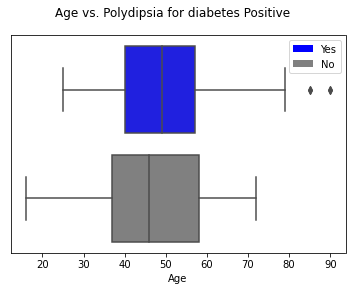

In [14]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Polydipsia",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Polydipsia for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="Grey", label="No")
]
ax.legend(handles=color_patches);

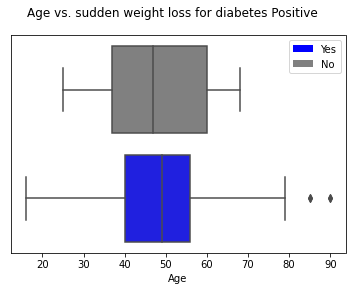

In [15]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="sudden weight loss",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. sudden weight loss for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="Grey", label="No")
]
ax.legend(handles=color_patches);

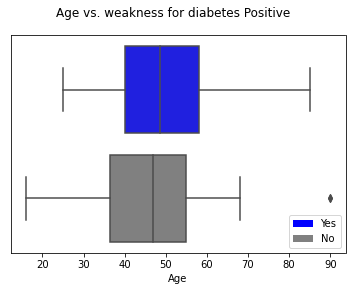

In [16]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="weakness",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. weakness for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="Grey", label="No")
]
ax.legend(handles=color_patches);

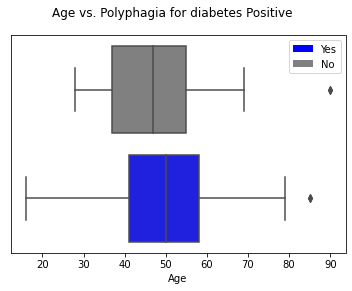

In [17]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Polyphagia",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Polyphagia for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="Grey", label="No")
]
ax.legend(handles=color_patches);

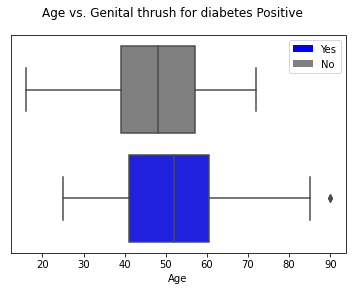

In [18]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Genital thrush",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Genital thrush for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="Grey", label="No")
]
ax.legend(handles=color_patches);

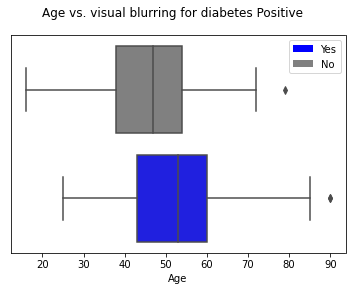

In [19]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="visual blurring",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. visual blurring for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="Grey", label="No")
]
ax.legend(handles=color_patches);

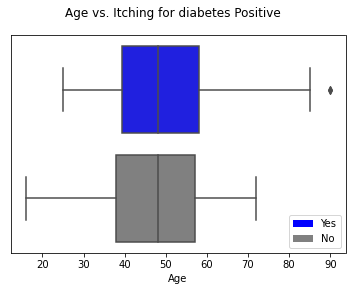

In [20]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Itching",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Itching for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="Grey", label="No")
]
ax.legend(handles=color_patches);

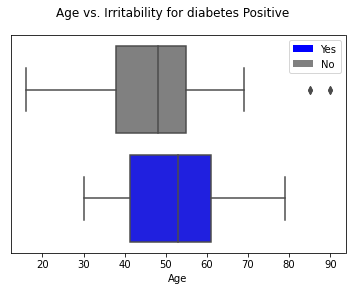

In [21]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Irritability",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Irritability for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="Grey", label="No")
]
ax.legend(handles=color_patches);

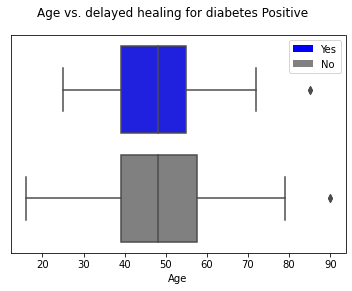

In [22]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="delayed healing",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. delayed healing for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="Grey", label="No")
]
ax.legend(handles=color_patches);

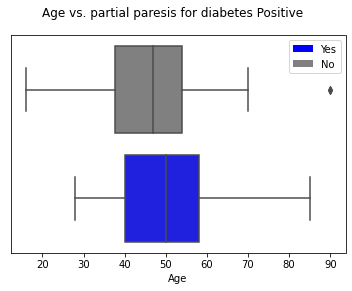

In [23]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="partial paresis",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. partial paresis for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="grey", label="No")
]
ax.legend(handles=color_patches);

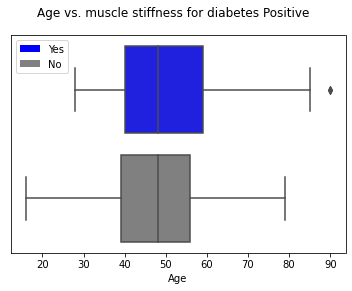

In [24]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="muscle stiffness",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. muscle stiffness for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="grey", label="No")
]
ax.legend(handles=color_patches);

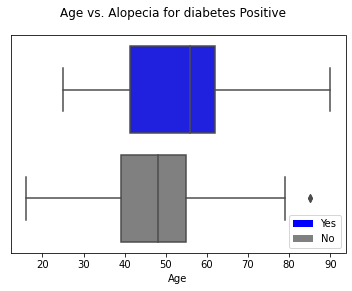

In [25]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Alopecia",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Alopecia for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="grey", label="No")
]
ax.legend(handles=color_patches);

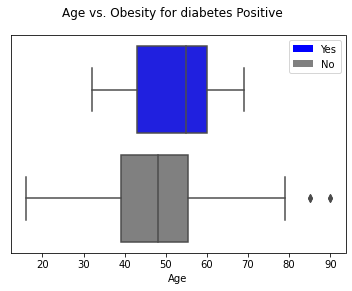

In [26]:
fig, ax = plt.subplots()

sns.boxplot(x="Age", y="Obesity",
            data=df[df['class']=='Positive'],
            orient="h", palette={"Yes":"blue", "No":"gray"},
            ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Obesity for diabetes Positive")

color_patches = [
    Patch(facecolor="blue", label="Yes"),
    Patch(facecolor="grey", label="No")
]
ax.legend(handles=color_patches);

In [27]:
df.Age.value_counts()

35    30
48    28
30    25
43    25
40    24
55    22
47    21
38    20
53    20
58    18
45    18
50    18
39    16
54    16
57    15
60    15
68    10
66     9
28     9
42     9
72     9
56     8
36     8
46     8
61     8
67     8
37     7
44     7
49     7
62     7
27     6
65     6
34     6
51     5
64     5
69     5
70     5
32     5
59     4
41     4
33     4
52     4
63     3
31     3
25     2
90     2
85     2
29     1
26     1
79     1
16     1
Name: Age, dtype: int64

In [28]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [29]:
def f(df):
    if 10 <= df['Age'] < 20:
        val = 10
    elif 20 <= df['Age'] < 30:
        val = 20
    elif 30 <= df['Age'] < 40:
        val = 30
    elif 40 <= df['Age'] < 50:
        val = 40
    elif 50 <= df['Age'] < 60:
        val = 50
    elif 60 <= df['Age'] < 70:
        val = 60
    elif 70 <= df['Age'] < 80:
        val = 70
    elif 80 <= df['Age'] < 90:
        val = 80
    elif 90 <= df['Age'] < 100:
        val = 90
    else:
        val = 0
    return val

In [30]:
df['Age_Range'] = df.apply(f, axis=1)

In [31]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_Range
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,40
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,50
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,40
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,40
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,60


In [32]:
df['Age_Range'].isnull().value_counts()

False    520
Name: Age_Range, dtype: int64

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


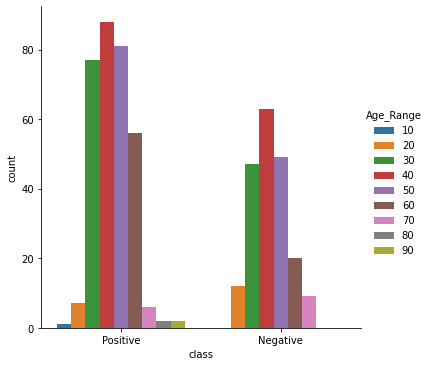

In [33]:
fig, ax = plt.subplots()

sns.catplot("class", hue="Age_Range", data=df, kind="count", 
            ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("Age_Range vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


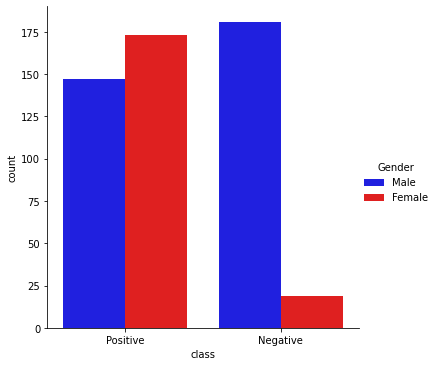

In [34]:
fig, ax = plt.subplots()

sns.catplot("class", hue="Gender", data=df, kind="count", 
            palette={"Male":"blue", 'Female':"red"}, ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Passenger Class")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("Gender vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


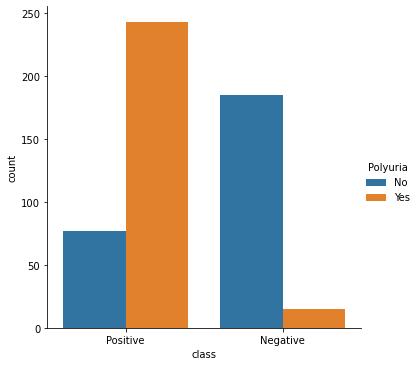

In [35]:
fig, ax = plt.subplots()

sns.catplot("class", hue="Polyuria", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("Polyuria vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


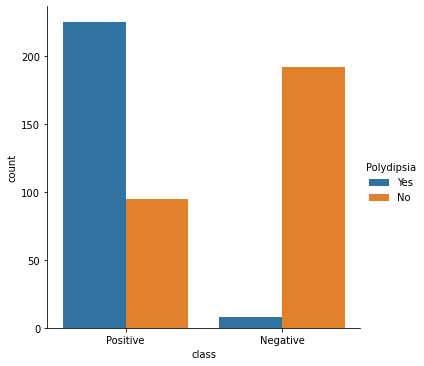

In [36]:
fig, ax = plt.subplots()

sns.catplot("class", hue="Polydipsia", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("Polydipsia vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


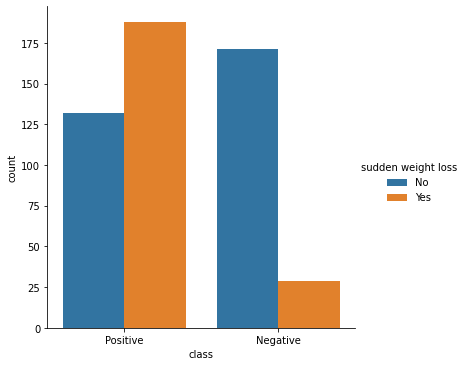

In [37]:
fig, ax = plt.subplots()

sns.catplot("class", hue="sudden weight loss", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("sudden weight loss vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


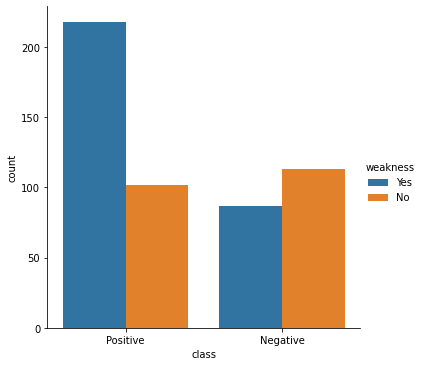

In [38]:
fig, ax = plt.subplots()

sns.catplot("class", hue="weakness", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("weakness vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


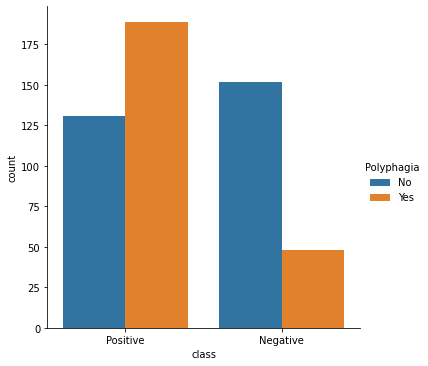

In [39]:
fig, ax = plt.subplots()

sns.catplot("class", hue="Polyphagia", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("Polyphagia vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


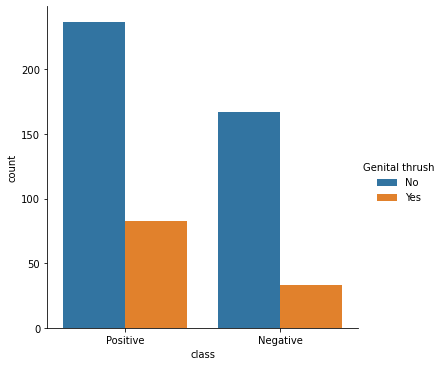

In [40]:
fig, ax = plt.subplots()

sns.catplot("class", hue="Genital thrush", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("Genital thrush vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


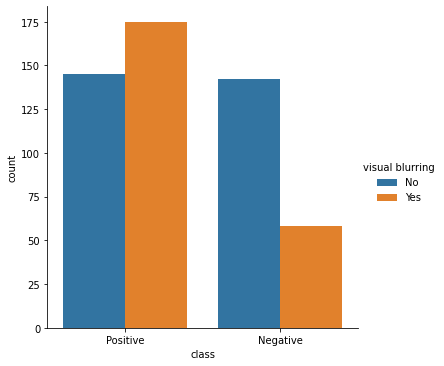

In [41]:
fig, ax = plt.subplots()

sns.catplot("class", hue="visual blurring", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("visual blurring vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


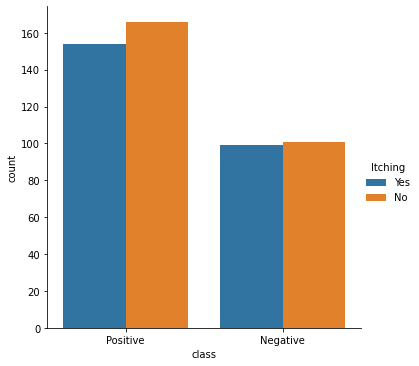

In [42]:
fig, ax = plt.subplots()

sns.catplot("class", hue="Itching", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("Itching vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


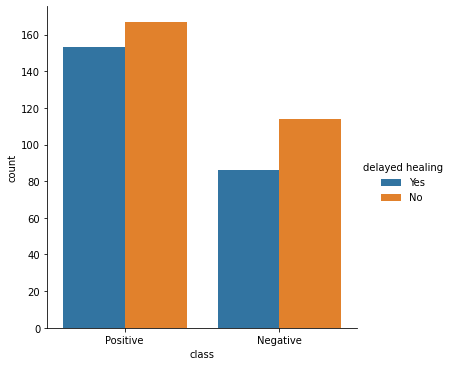

In [43]:
fig, ax = plt.subplots()

sns.catplot("class", hue="delayed healing", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("delayed healing vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


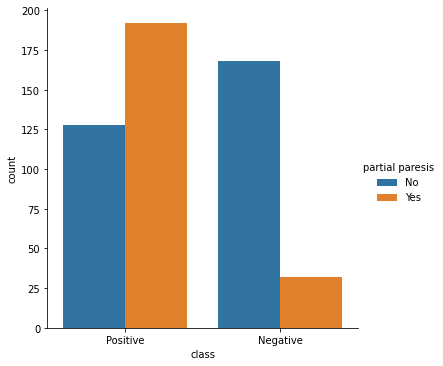

In [44]:
fig, ax = plt.subplots()

sns.catplot("class", hue="partial paresis", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("partial paresis vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


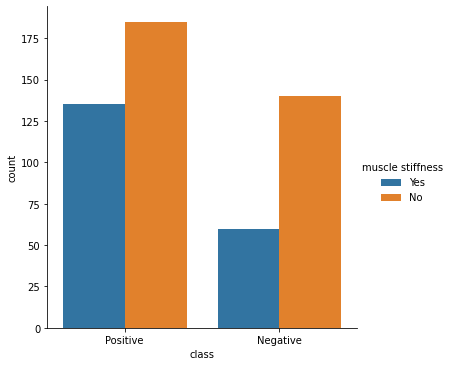

In [45]:
fig, ax = plt.subplots()

sns.catplot("class", hue="muscle stiffness", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("muscle stiffness vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


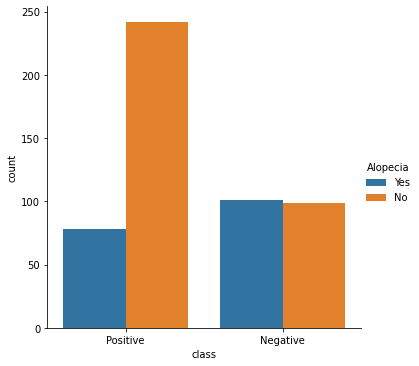

In [46]:
fig, ax = plt.subplots()

sns.catplot("class", hue="Alopecia", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("Alopecia vs. class for Diabetes");

C:\Users\danie\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\danie\Anaconda\lib\site-packages\seaborn\categorical.py:3762: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.
C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


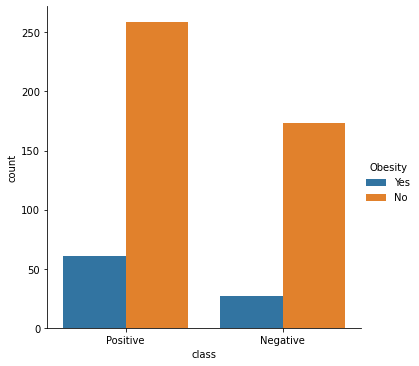

In [47]:
fig, ax = plt.subplots()

sns.catplot("class", hue="Obesity", data=df,
            kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.legend(title="Diabetes")
ax.set_xticklabels(["Negative", "Positive"])
ax.set_xlabel("")

fig.suptitle("Obesity vs. class for Diabetes");

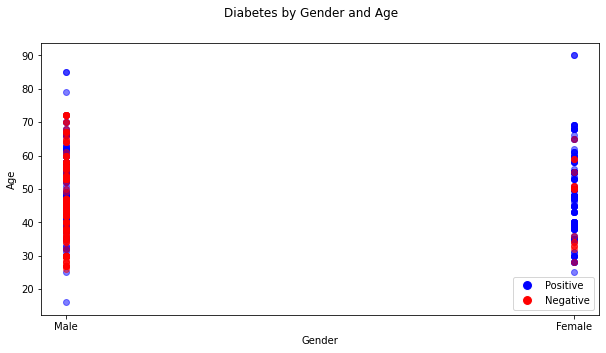

In [48]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["Gender"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["Gender"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("Gender")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Gender and Age");

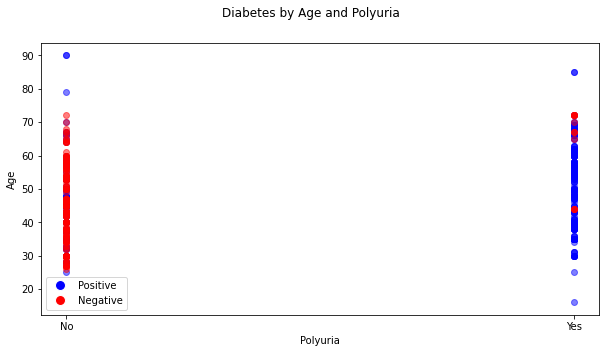

In [49]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["Polyuria"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["Polyuria"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("Polyuria")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and Polyuria");

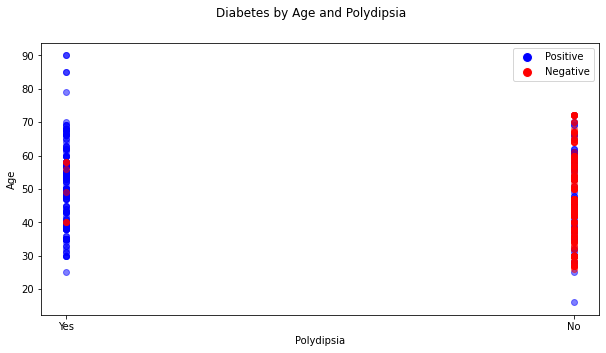

In [50]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["Polydipsia"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["Polydipsia"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("Polydipsia")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and Polydipsia");

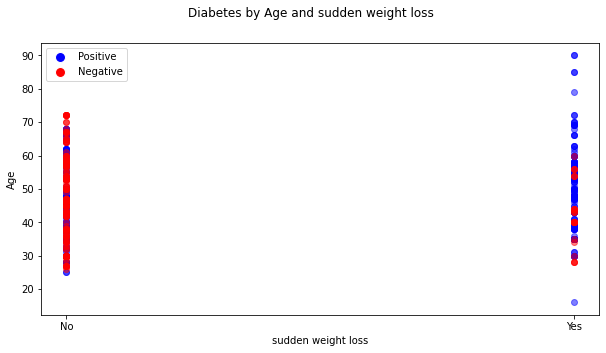

In [51]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["sudden weight loss"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["sudden weight loss"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("sudden weight loss")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and sudden weight loss");

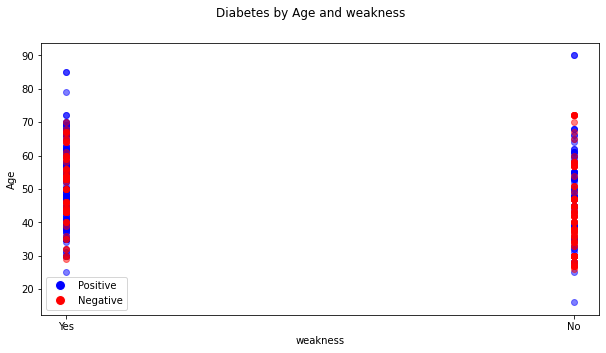

In [52]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["weakness"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["weakness"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("weakness")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and weakness");

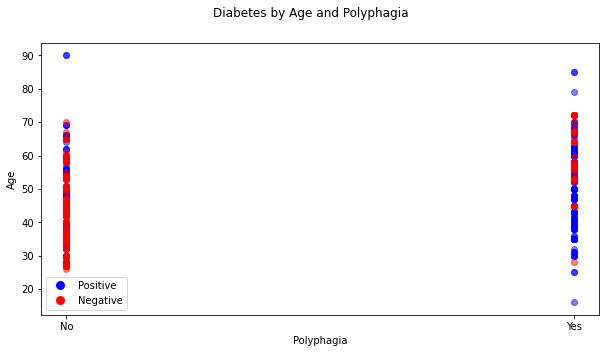

In [53]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["Polyphagia"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["Polyphagia"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("Polyphagia")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and Polyphagia");

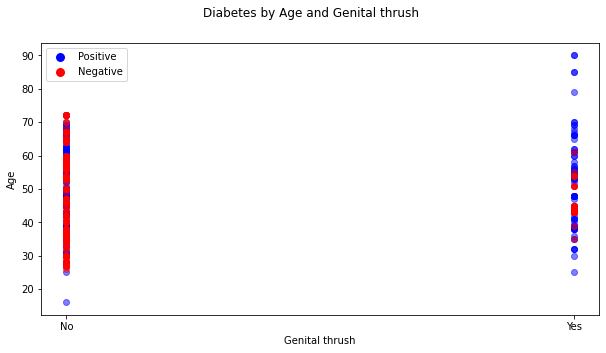

In [54]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["Genital thrush"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["Genital thrush"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("Genital thrush")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and Genital thrush");

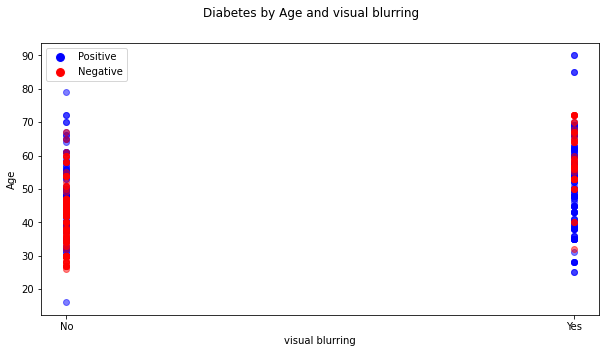

In [55]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["visual blurring"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["visual blurring"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("visual blurring")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and visual blurring");

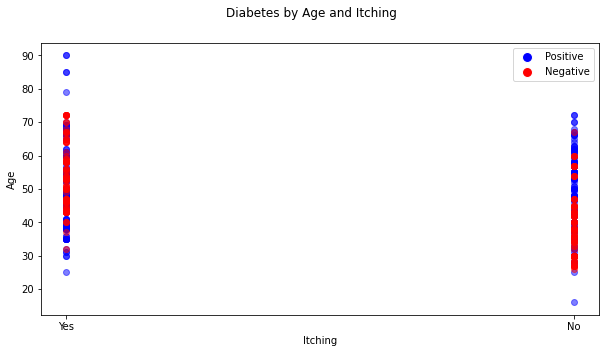

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["Itching"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["Itching"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("Itching")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and Itching");

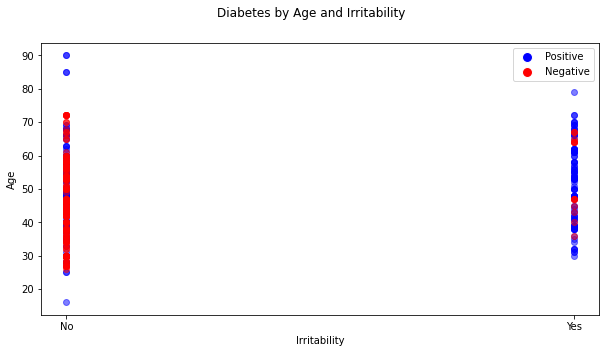

In [57]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["Irritability"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["Irritability"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("Irritability")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and Irritability");

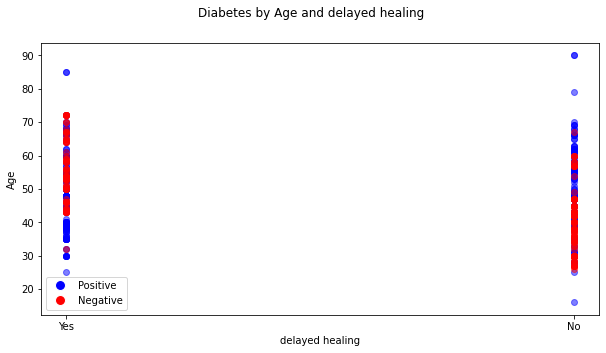

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["delayed healing"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["delayed healing"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("delayed healing")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and delayed healing");

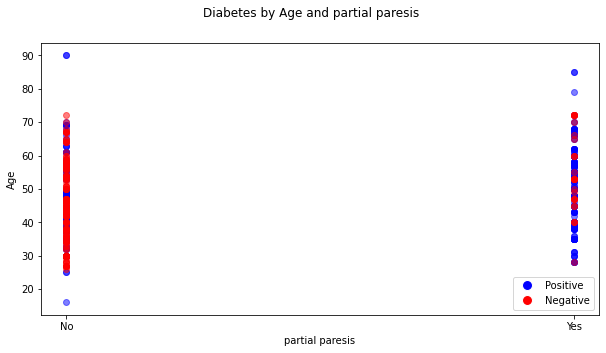

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["partial paresis"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["partial paresis"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("partial paresis")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and partial paresis");

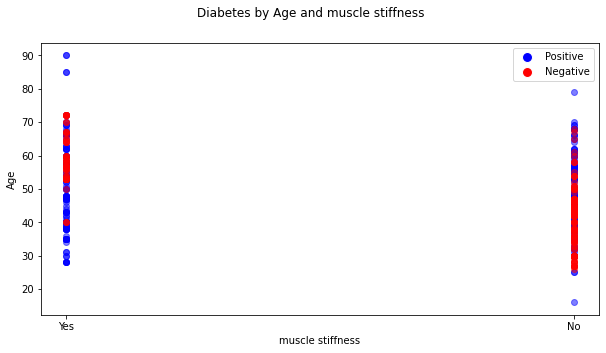

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["muscle stiffness"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["muscle stiffness"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("muscle stiffness")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and muscle stiffness");

 'Alopecia', 'Obesity', 'class']

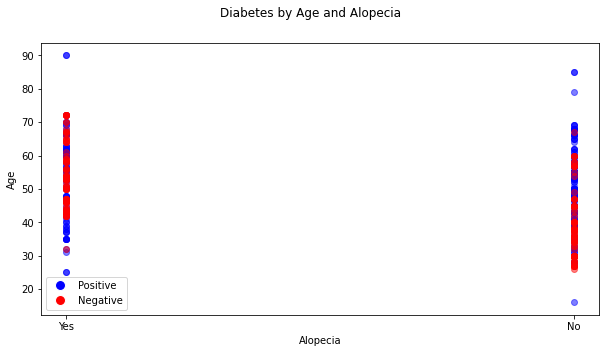

In [61]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(df[df["class"]=="Positive"]["Alopecia"], df[df["class"]=="Positive"]["Age"], c="blue", alpha=0.5)
ax.scatter(df[df["class"]=="Negative"]["Alopecia"], df[df["class"]=="Negative"]["Age"], c="red", alpha=0.5)

ax.set_xlabel("Alopecia")
ax.set_ylabel("Age")

color_patches = [
    Line2D([0], [0], marker='o', color='w', label='Positive', markerfacecolor='b', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Negative', markerfacecolor='r', markersize=10)
]
ax.legend(handles=color_patches)

fig.suptitle("Diabetes by Age and Alopecia");

# One Hot Encoding

In [62]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,Age,Age_Range,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive
0,40,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,50,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,40,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,40,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     520 non-null    int64
 1   Age_Range               520 non-null    int64
 2   Gender_Male             520 non-null    uint8
 3   Polyuria_Yes            520 non-null    uint8
 4   Polydipsia_Yes          520 non-null    uint8
 5   sudden weight loss_Yes  520 non-null    uint8
 6   weakness_Yes            520 non-null    uint8
 7   Polyphagia_Yes          520 non-null    uint8
 8   Genital thrush_Yes      520 non-null    uint8
 9   visual blurring_Yes     520 non-null    uint8
 10  Itching_Yes             520 non-null    uint8
 11  Irritability_Yes        520 non-null    uint8
 12  delayed healing_Yes     520 non-null    uint8
 13  partial paresis_Yes     520 non-null    uint8
 14  muscle stiffness_Yes    520 non-null    uint8
 15  Alopecia_Yes           

Wall time: 27.6 s


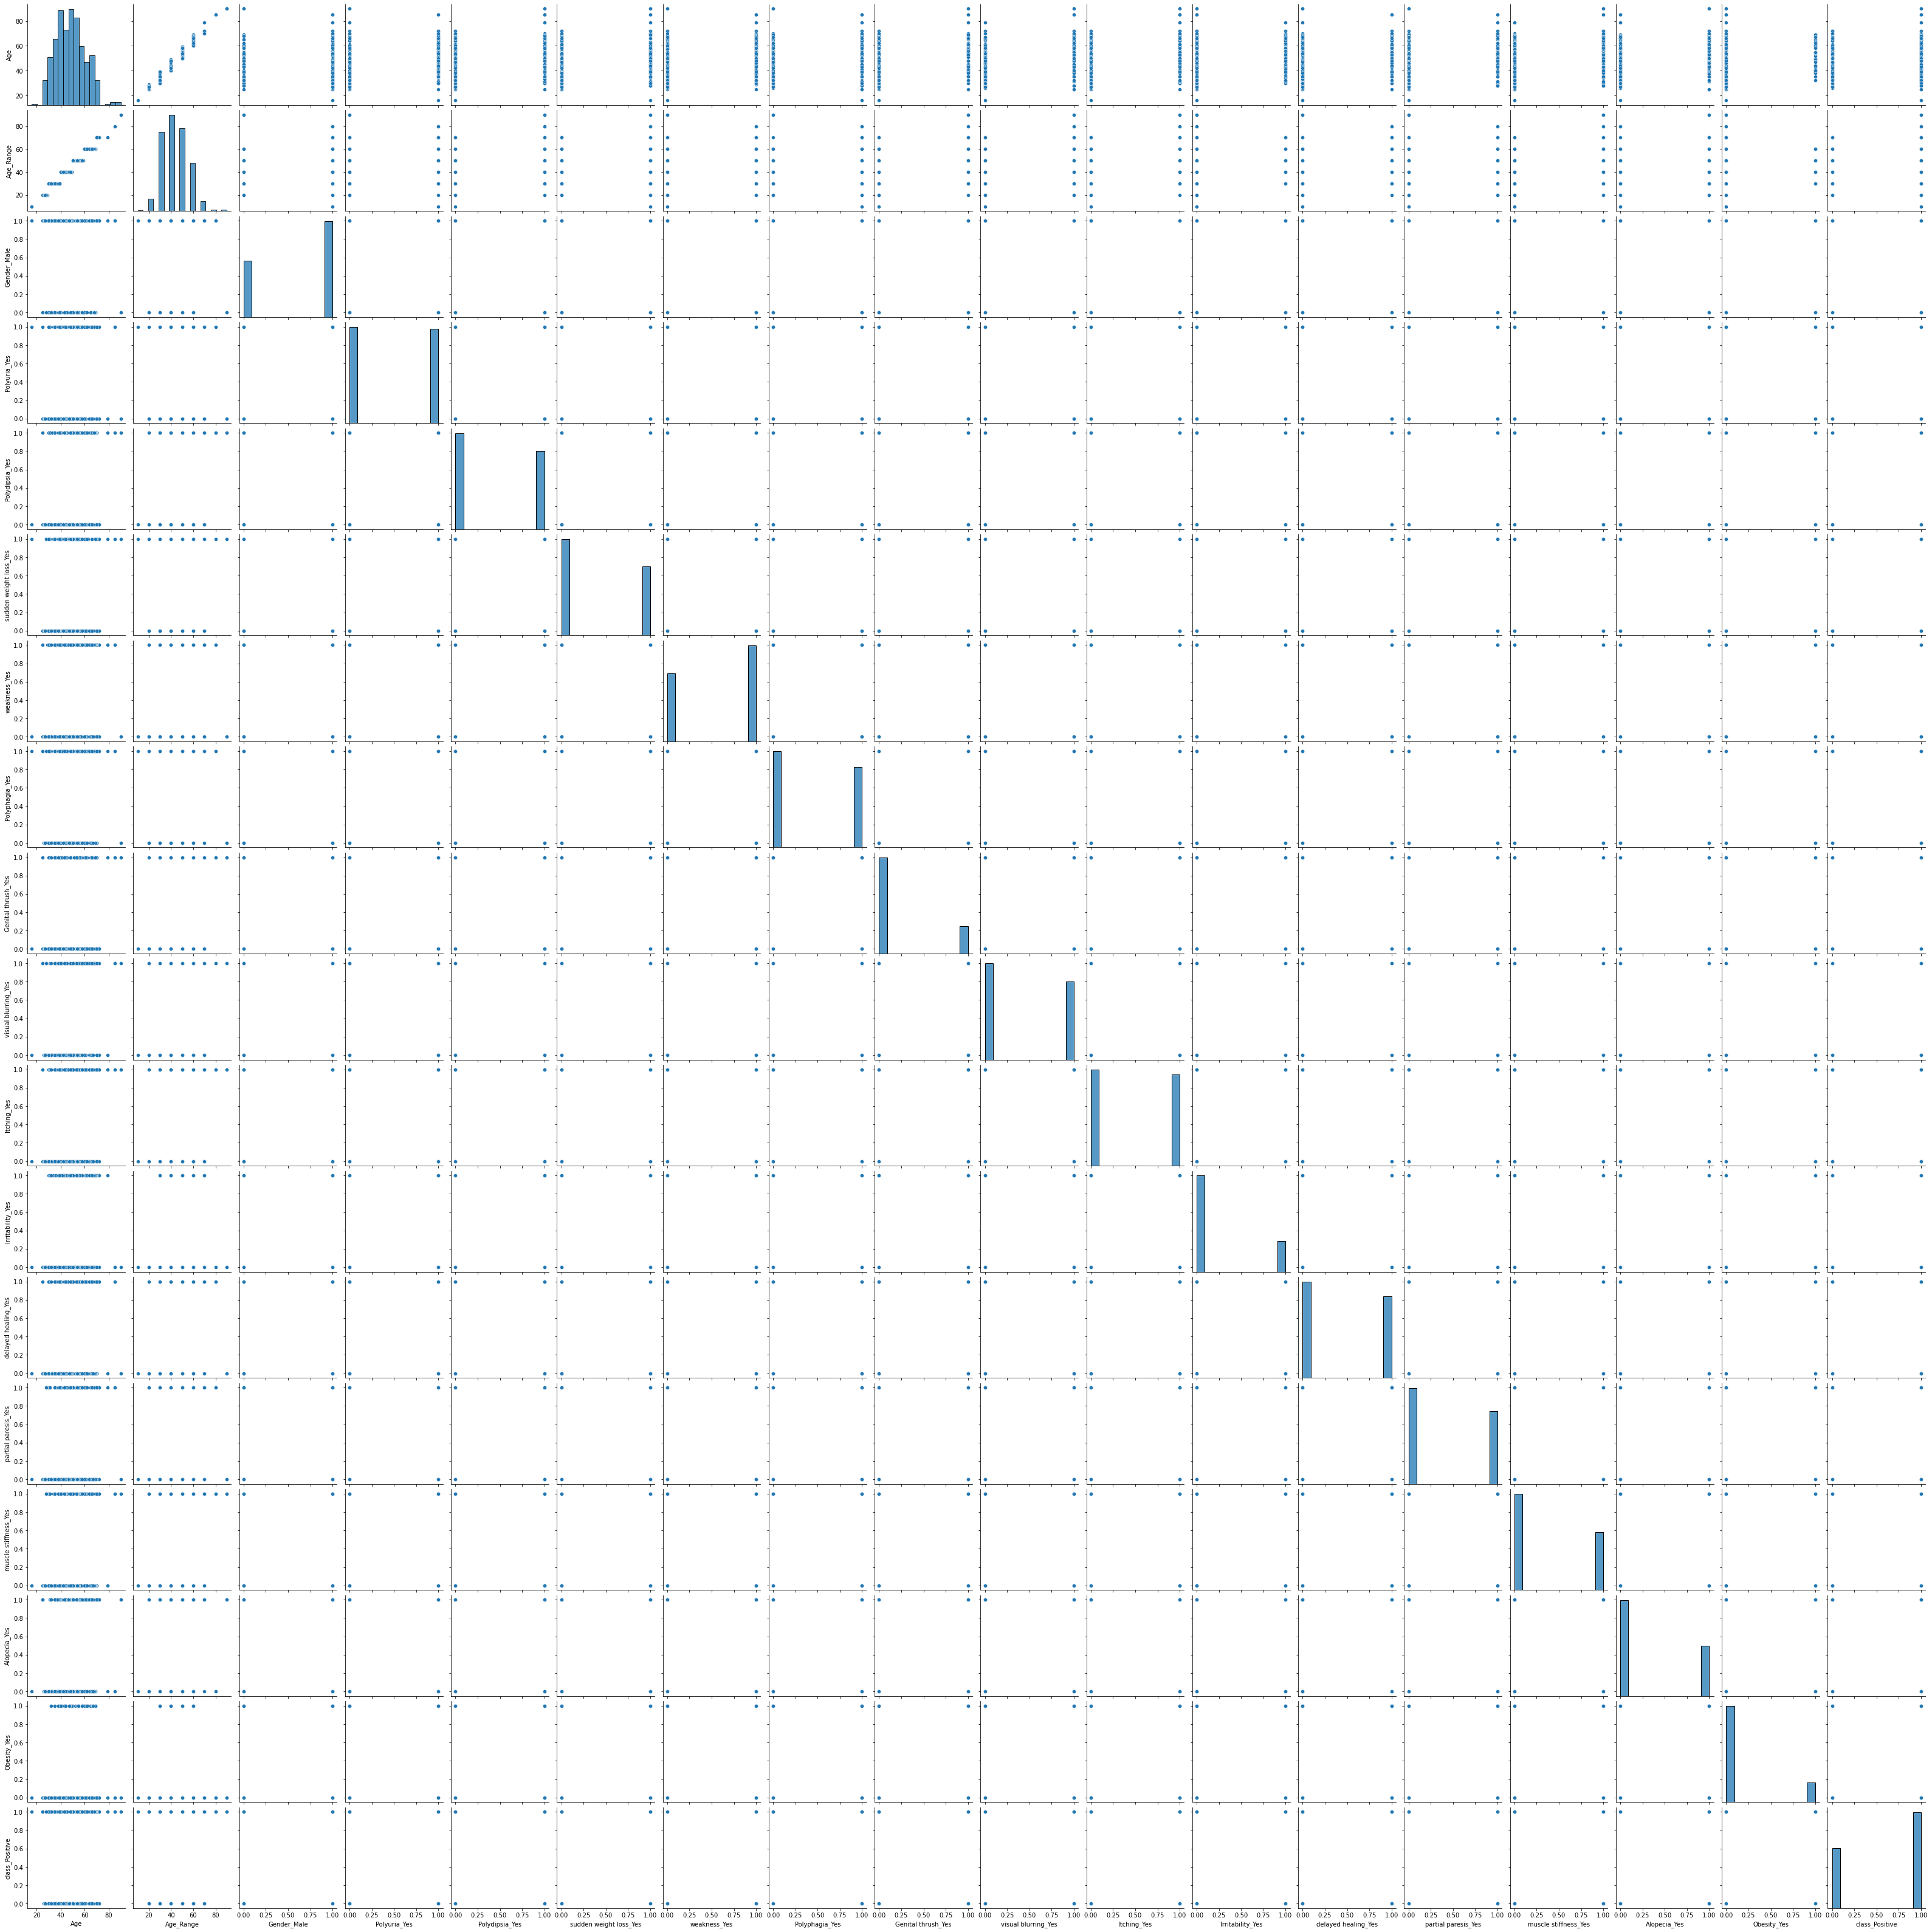

In [64]:
%%time
sns.pairplot(df);

In [65]:
df.columns

Index(['Age', 'Age_Range', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
       'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes',
       'class_Positive'],
      dtype='object')

Wall time: 0 ns


C:\Users\danie\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danie\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danie\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

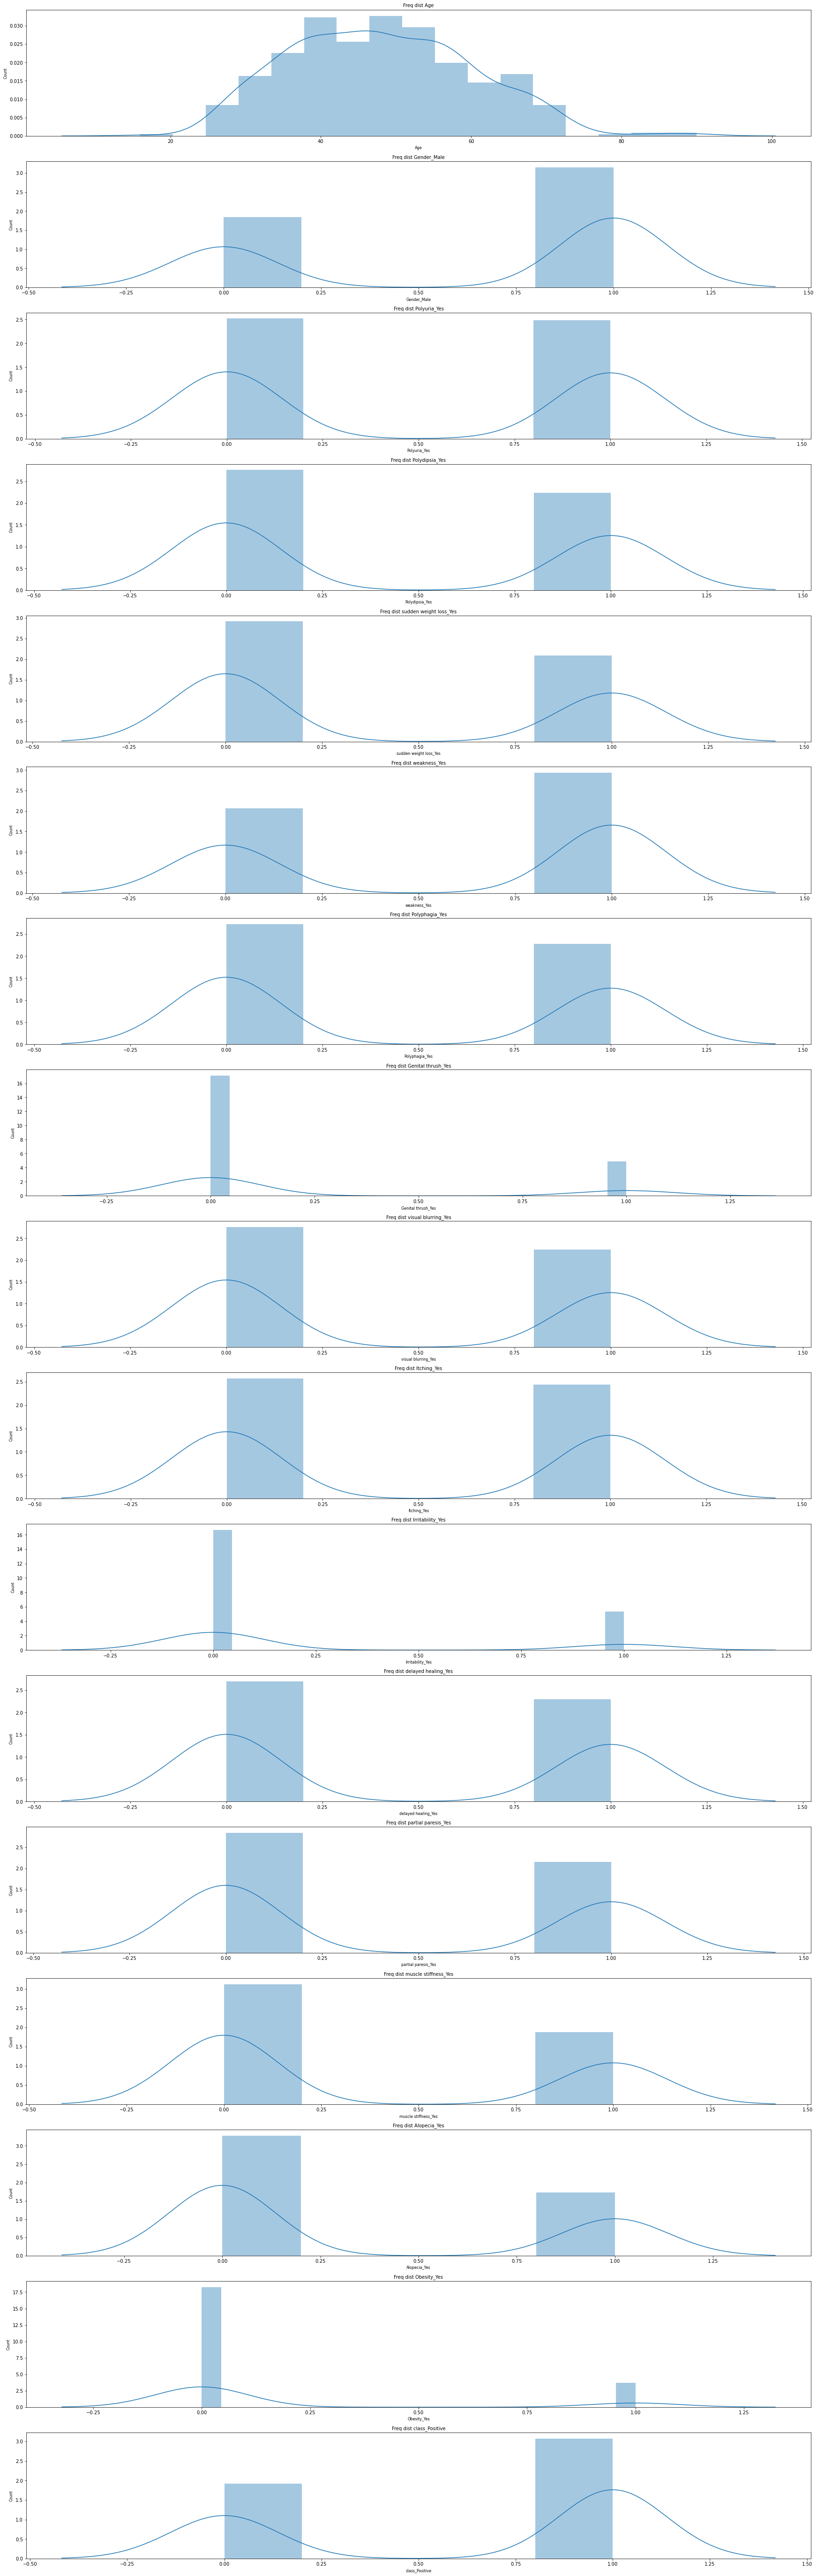

In [66]:
%time
col_names = ['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'weakness_Yes', 'Polyphagia_Yes',
       'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes',
       'Irritability_Yes', 'delayed healing_Yes', 'partial paresis_Yes',
       'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes',
       'class_Positive']

fig, ax = plt.subplots(len(col_names), figsize=(30,100))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show();

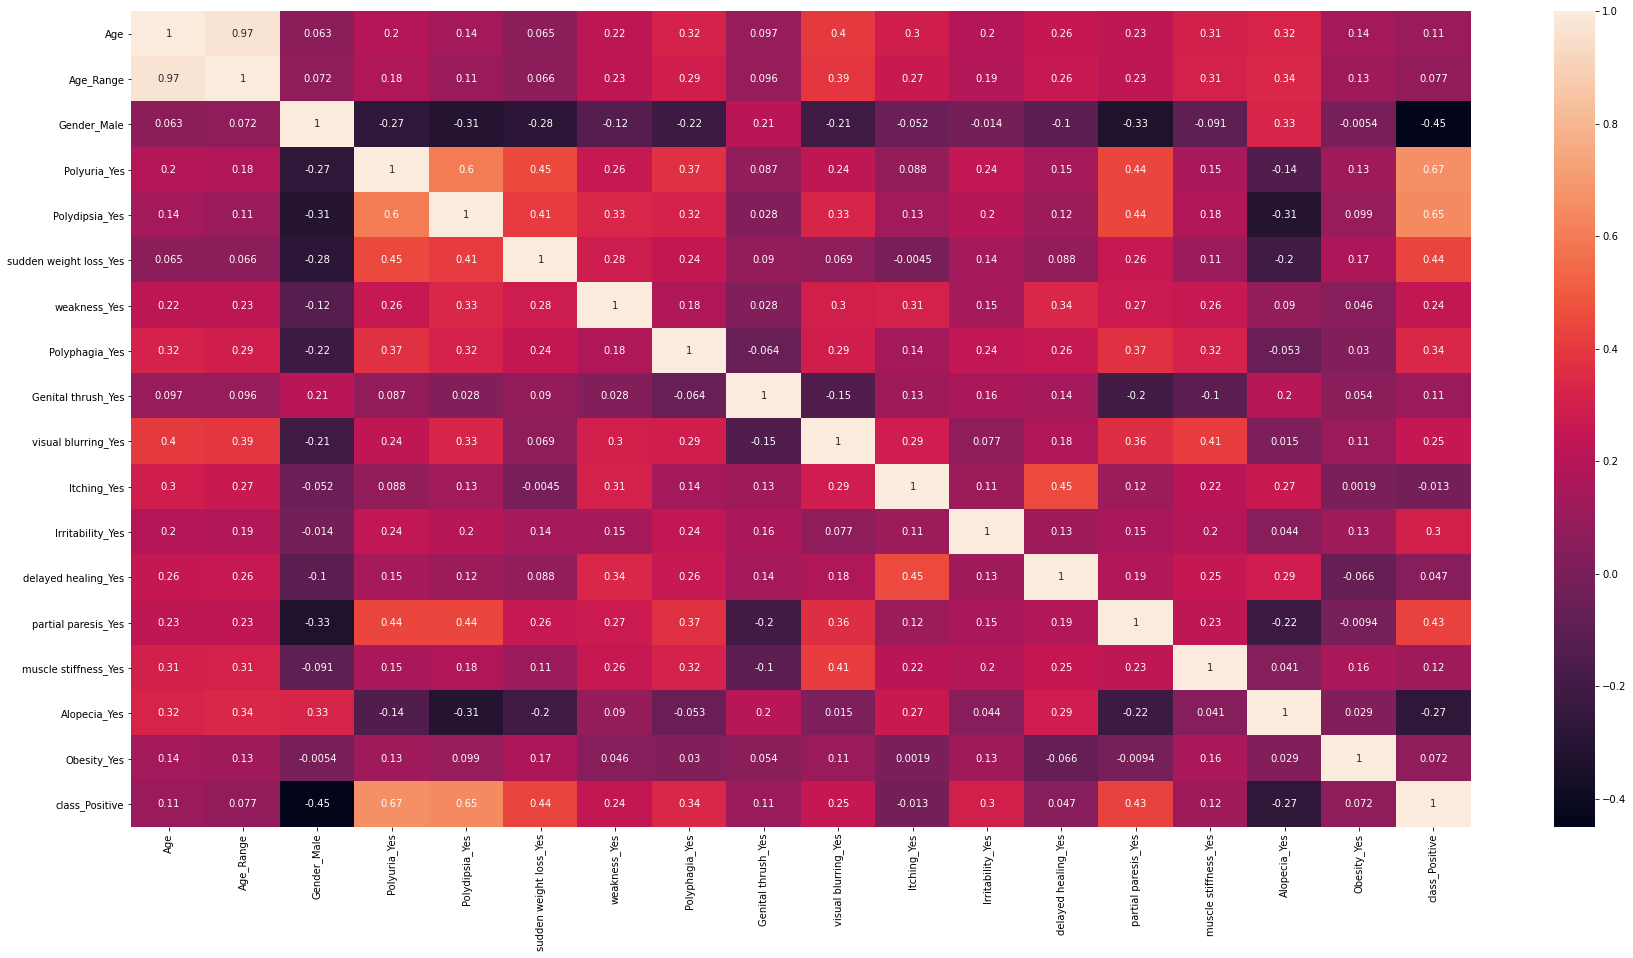

In [67]:
f, ax = plt.subplots(figsize=(30, 15))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True);

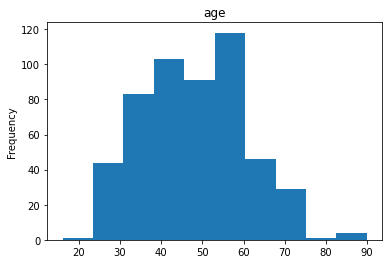

In [68]:
df.Age.plot.hist(title='age');

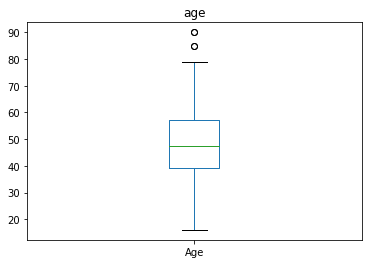

In [69]:
df.Age.plot.box(title='age');

# Remove Outliers by using IsolationForest.

In [70]:
%%time
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=50, max_samples=50, contamination=float(0.004), 
                    max_features=1.0, bootstrap=False, n_jobs=-1,
                    random_state=42, verbose=0,behaviour="new")
# 50개의 노드 수, 최대 50개의 샘플
# 0.04%의 outlier 색출.
clf.fit(df)
pred = clf.predict(df)
df['anomaly']=pred
outliers=df.loc[df['anomaly']==-1]
outlier_index=list(outliers.index)
#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())

 1    518
-1      2
Name: anomaly, dtype: int64
Wall time: 932 ms


C:\Users\danie\Anaconda\lib\site-packages\sklearn\ensemble\_iforest.py:255: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


In [71]:
df[df['anomaly']==-1]

,Age,Age_Range,Gender_Male,Polyuria_Yes,Polydipsia_Yes,sudden weight loss_Yes,weakness_Yes,Polyphagia_Yes,Genital thrush_Yes,visual blurring_Yes,Itching_Yes,Irritability_Yes,delayed healing_Yes,partial paresis_Yes,muscle stiffness_Yes,Alopecia_Yes,Obesity_Yes,class_Positive,anomaly
100,48,40,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,-1
184,48,40,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,-1


It is not necessary to drop just 2 outliers.

In [72]:
#Let's drop rows whose 'anomaly' value is -1.

In [73]:
#df.drop(df[df['anomaly']==-1].index, inplace=True)

In [74]:
#Let's drop the column, 'anomaly'.

In [75]:
#df.drop(['anomaly'], axis = 1, inplace=True)

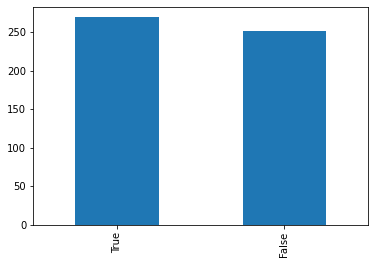

In [76]:
df.duplicated().value_counts().plot.bar();

As seen above, the number of duplicated rows outnumbers the number of NOT duplicated; this can be interpreted as there are many people who share the  exact same symptoms.

<AxesSubplot:>

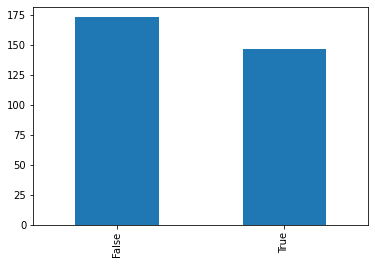

In [77]:
df[df['class_Positive']==1].duplicated().value_counts().plot.bar()

<AxesSubplot:>

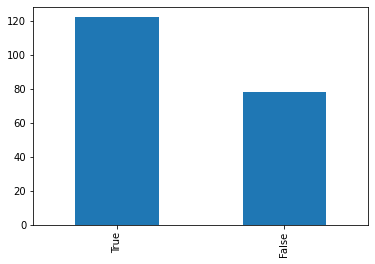

In [78]:
df[df['class_Positive']==0].duplicated().value_counts().plot.bar()

Interestingly, people with diabetes ('class_Positive'==1) share less the same symptoms while people without diabetes ('class_Positive'==0) share more the same symptoms.

Let's makes features as X and target as y.

In [79]:
X = df.drop('class_Positive', axis=1)
y = df['class_Positive'].values

In [80]:
df = df.astype('int')

# Split train test data

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Decision Tree Classifier with RandomizedSearchCV

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
rt = DecisionTreeClassifier()
rt.fit(X_train, y_train)

DecisionTreeClassifier()

# CART Decision Tree Classifier Feature Importance

Wall time: 0 ns
Feature: 0, Score: 0.05733
Feature: 2, Score: 0.10811
Feature: 3, Score: 0.45146
Feature: 4, Score: 0.08262
Feature: 15, Score: 0.07077


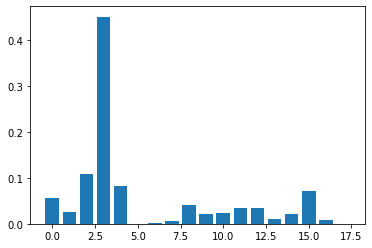

In [84]:
%time
importance = rt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v >= 0.05:
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show();

In [85]:
X_train.columns[[0,2,3,4,15]]

Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes', 'Alopecia_Yes'], dtype='object')

In [86]:
X1 = df[['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes', 'Alopecia_Yes']]

In [87]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y)

In [88]:
rt.fit(X_train, y_train)

DecisionTreeClassifier()

In [105]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, precision_score,  recall_score

In [113]:
%time
params = {'criterion' :['gini', 'entropy'],
          'splitter' : ['best', 'random'],
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [1,2,5,10,15,100],
          'min_samples_leaf' : [1,2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2', None],
          'random_state' : [42],
          'class_weight' : ['balanced', None]}

scoring = {'Accuracy': make_scorer(accuracy_score),
           'F1': make_scorer(f1_score),
           'Precision': make_scorer(precision_score),
           'Recall': make_scorer(recall_score),
          }
refit_scoring = ['Accuracy', 'F1', 'Precision', 'Recall']
random_search_cv = RandomizedSearchCV(rt, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='Accuracy',
                                     return_train_score=True)
                                    
random_search_cv.fit(X_train, y_train)
print("Best Score of Accuracy::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Wall time: 0 ns
R-Squared::0.9153846153846154
Best Hyperparameters::
{'splitter': 'best', 'random_state': 42, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy', 'class_weight': None}


In [114]:
%time

random_search_cv = RandomizedSearchCV(rt, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='F1',
                                     return_train_score=True)
                                    
random_search_cv.fit(X_train, y_train)
print("Best Score of F1::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Wall time: 0 ns
R-Squared::0.9439293437073351
Best Hyperparameters::
{'splitter': 'best', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 25, 'criterion': 'gini', 'class_weight': 'balanced'}


In [115]:
%time

random_search_cv = RandomizedSearchCV(rt, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='Precision',
                                     return_train_score=True)
                                    
random_search_cv.fit(X_train, y_train)
print("Best Score of Precision::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Wall time: 0 ns
R-Squared::0.9679653679653679
Best Hyperparameters::
{'splitter': 'random', 'random_state': 42, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [116]:
%time

random_search_cv = RandomizedSearchCV(rt, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='Recall',
                                     return_train_score=True)
                                    
random_search_cv.fit(X_train, y_train)
print("Best Score of Recall::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Wall time: 0 ns
R-Squared::0.9183163737280295
Best Hyperparameters::
{'splitter': 'best', 'random_state': 42, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [117]:
from sklearn import tree

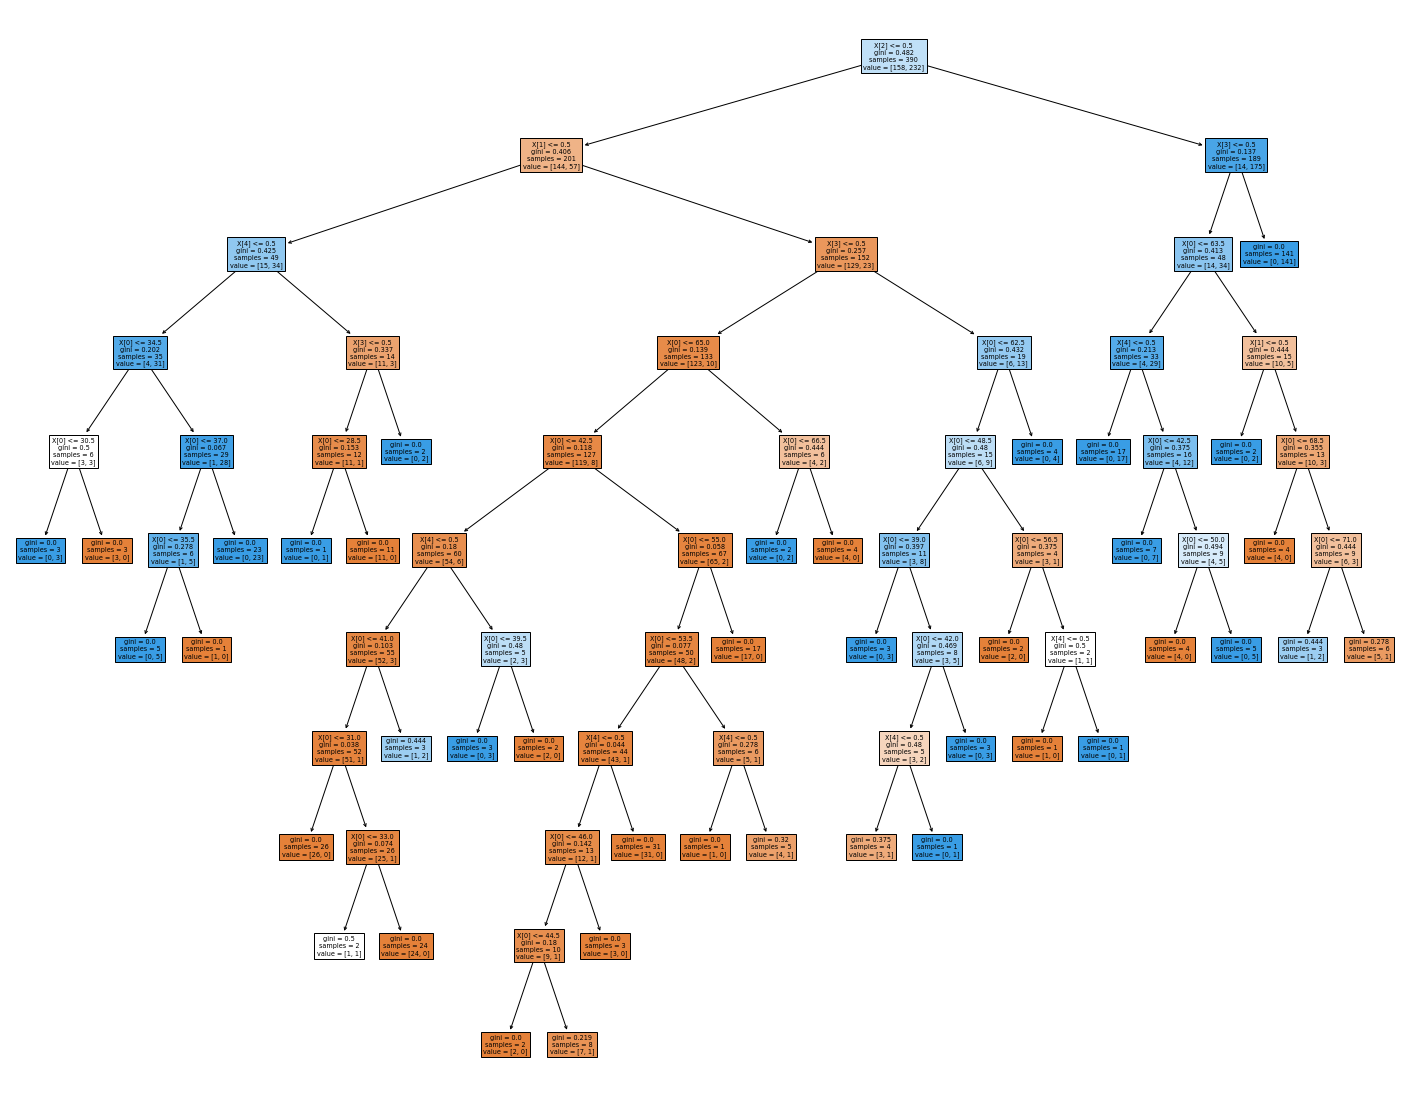

In [118]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(rt,filled=True, max_depth = 30)

In [119]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Random Forest Classifier

In [120]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# CART Random Forest Classifier Feature Importance

Wall time: 0 ns
Feature: 0, Score: 0.08616
Feature: 2, Score: 0.09658
Feature: 3, Score: 0.19569
Feature: 4, Score: 0.18713
Feature: 5, Score: 0.06784
Feature: 13, Score: 0.05401


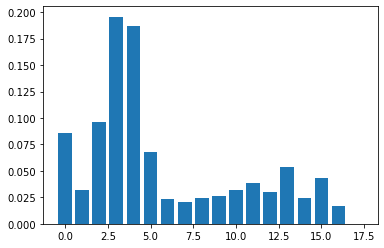

In [121]:
%time
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v >= 0.05:
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show();

In [122]:
X_train.columns[[0,2,3,4,5,13]]

Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes',
       'sudden weight loss_Yes', 'partial paresis_Yes'],
      dtype='object')

In [123]:
X1 = df[['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes', 'sudden weight loss_Yes', 'partial paresis_Yes']]

In [124]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y)

In [125]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
%time
params = {'n_estimators' : [120,300,500,800,1200],
          'criterion' :['gini', 'entropy'],        
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [2,5,10,15,100],
          'min_samples_leaf' : [2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2', None],
          'class_weight' : ['balanced', 'balanced_subsample', None]}

random_search_cv = RandomizedSearchCV(rf, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='Accuracy',
                                     return_train_score=True)
                    
random_search_cv.fit(X_train, y_train)
print("Best Score of Accuracy::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Wall time: 0 ns
R-Squared::0.9153846153846154
Best Hyperparameters::
{'n_estimators': 120, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 5, 'criterion': 'gini', 'class_weight': None}


In [128]:
random_search_cv = RandomizedSearchCV(rf, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='F1',
                                     return_train_score=True)
                    
random_search_cv.fit(X_train, y_train)
print("Best Score of F1::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

R-Squared::0.9402012025901942
Best Hyperparameters::
{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy', 'class_weight': None}


In [129]:
random_search_cv = RandomizedSearchCV(rf, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='Precision',
                                     return_train_score=True)
                    
random_search_cv.fit(X_train, y_train)
print("Best Score of Precision::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

R-Squared::0.9351471760696025
Best Hyperparameters::
{'n_estimators': 120, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 25, 'criterion': 'gini', 'class_weight': 'balanced_subsample'}


In [130]:
random_search_cv = RandomizedSearchCV(rf, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='Recall',
                                     return_train_score=True)
                    
random_search_cv.fit(X_train, y_train)
print("Best Score of Recall::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

R-Squared::0.95263644773358
Best Hyperparameters::
{'n_estimators': 120, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [131]:
from sklearn import ensemble

In [132]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [133]:
params_ = {'n_estimators': 120, 'min_samples_split': 5, 'min_samples_leaf': 2,
           'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'entropy',
           'class_weight': 'balanced'}

In [134]:
reg = ensemble.RandomForestClassifier(**params_)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0692


In [135]:
print(__doc__)
from collections import defaultdict

#import matplotlib.pyplot as plt
#import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

Automatically created module for IPython interactive environment


In [136]:
print("Accuracy on test data: {:.2f}".format(reg.score(X_test, y_test)))

Accuracy on test data: 0.93


C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


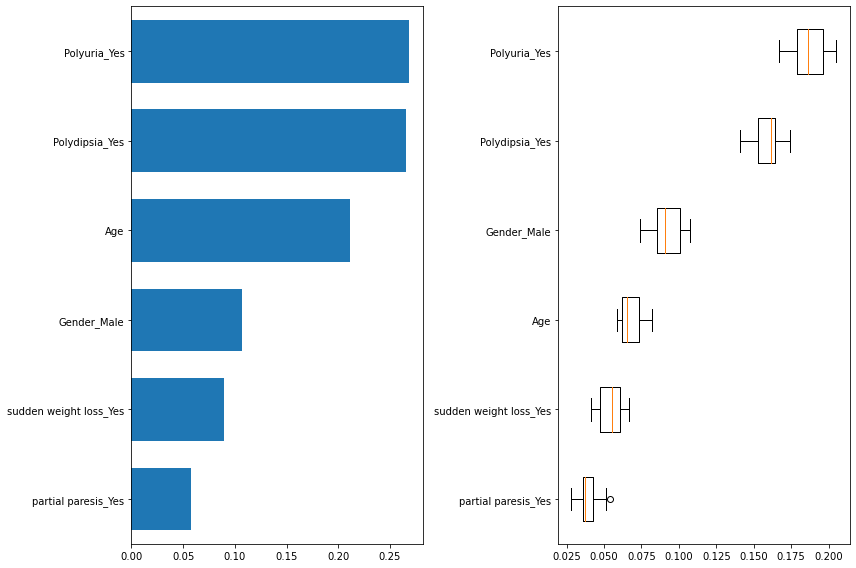

In [137]:
result = permutation_importance(reg, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         reg.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X1.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(reg.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X1.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

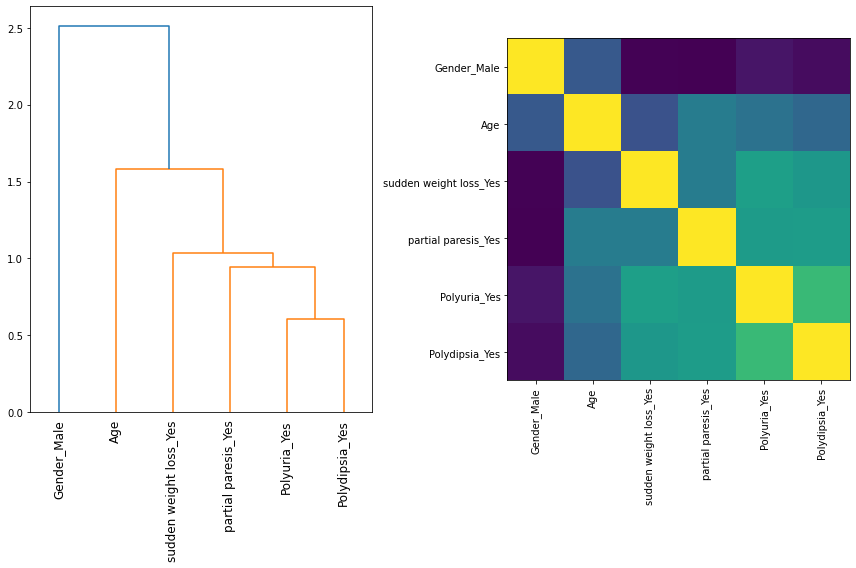

In [138]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=X_train.columns.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [139]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Gradient Boost Classifier

In [140]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

# CART Gradient Boost Feature Importance

Wall time: 0 ns
Feature: 0, Score: 0.06361
Feature: 2, Score: 0.11018
Feature: 3, Score: 0.38965
Feature: 4, Score: 0.21548
Feature: 15, Score: 0.05364


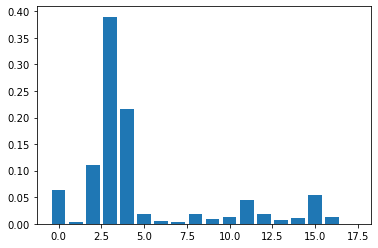

In [141]:
%time
importance = gb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v >= 0.05:
        print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show();

In [142]:
X_train.columns[[0,2,3,4,15]]

Index(['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes', 'Alopecia_Yes'], dtype='object')

In [143]:
X1 = df[['Age', 'Gender_Male', 'Polyuria_Yes', 'Polydipsia_Yes', 'Alopecia_Yes']]

In [144]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X1, y)

In [145]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [146]:
%time
params = {'loss' : ['deviance', 'exponential'],
          'n_estimators' : [120,300,500,800,1200],
          'criterion' :['friedman_mse', 'mse', 'mae'],          
          'max_depth' : [5,8,15,25,30,None],
          'min_samples_split' : [1,2,5,10,15,100],
          'min_samples_leaf' : [1,2,5,10],
          'max_features' : ['auto', 'sqrt', 'log2', None]}

random_search_cv = RandomizedSearchCV(gb, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='Accuracy',
                                     return_train_score=True)
                    
random_search_cv.fit(X_train, y_train)
print("Best Score of Accuracy::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

Wall time: 0 ns
R-Squared::0.941025641025641
Best Hyperparameters::
{'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'loss': 'exponential', 'criterion': 'mae'}


In [147]:
random_search_cv = RandomizedSearchCV(gb, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='F1',
                                     return_train_score=True)
                    
random_search_cv.fit(X_train, y_train)
print("Best Score of F1::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

R-Squared::0.9519868011201634
Best Hyperparameters::
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'loss': 'exponential', 'criterion': 'friedman_mse'}


In [148]:
random_search_cv = RandomizedSearchCV(gb, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='Precision',
                                     return_train_score=True)
                    
random_search_cv.fit(X_train, y_train)
print("Best Score of Precision::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

R-Squared::0.9639797345266011
Best Hyperparameters::
{'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 15, 'loss': 'deviance', 'criterion': 'mse'}


In [149]:
random_search_cv = RandomizedSearchCV(gb, params, n_jobs=-1,
                                      scoring=scoring,
                                      refit='Recall',
                                     return_train_score=True)
                    
random_search_cv.fit(X_train, y_train)
print("Best Score of Recall::{}".format(random_search_cv.best_score_))
print("Best Hyperparameters::\n{}".format(random_search_cv.best_params_))

R-Squared::0.9460034013605443
Best Hyperparameters::
{'n_estimators': 120, 'min_samples_split': 100, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5, 'loss': 'exponential', 'criterion': 'friedman_mse'}


In [150]:
params_ = {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1,
           'max_features': 'auto', 'max_depth': 15, 'loss': 'deviance', 'criterion': 'mse'}

In [151]:
reg = ensemble.GradientBoostingClassifier(**params_)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0769


In [152]:
print(__doc__)
from collections import defaultdict

#import matplotlib.pyplot as plt
#import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy

Automatically created module for IPython interactive environment


In [153]:
print("Accuracy on test data: {:.2f}".format(reg.score(X_test, y_test)))

Accuracy on test data: 0.92


C:\Users\danie\Anaconda\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


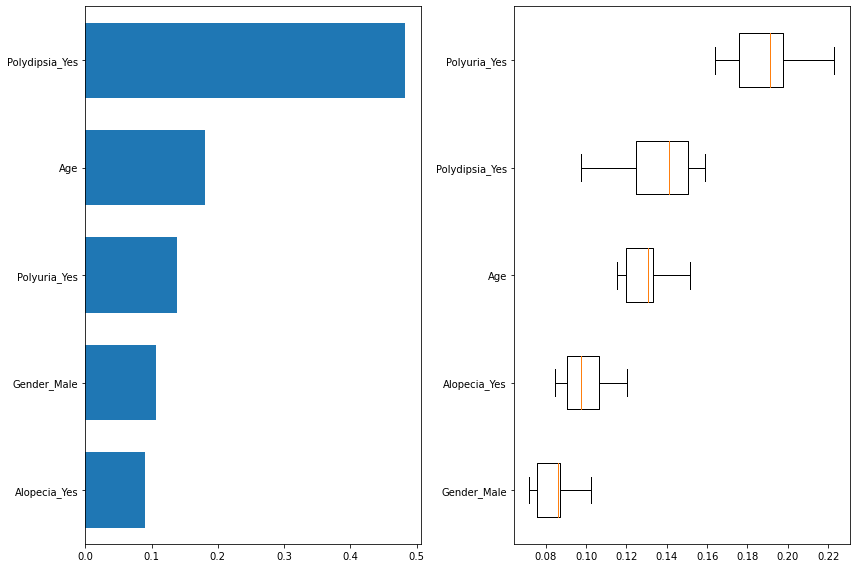

In [154]:
result = permutation_importance(reg, X_train, y_train, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         reg.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticklabels(X1.columns[tree_importance_sorted_idx])
ax1.set_yticks(tree_indices)
ax1.set_ylim((0, len(reg.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X1.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

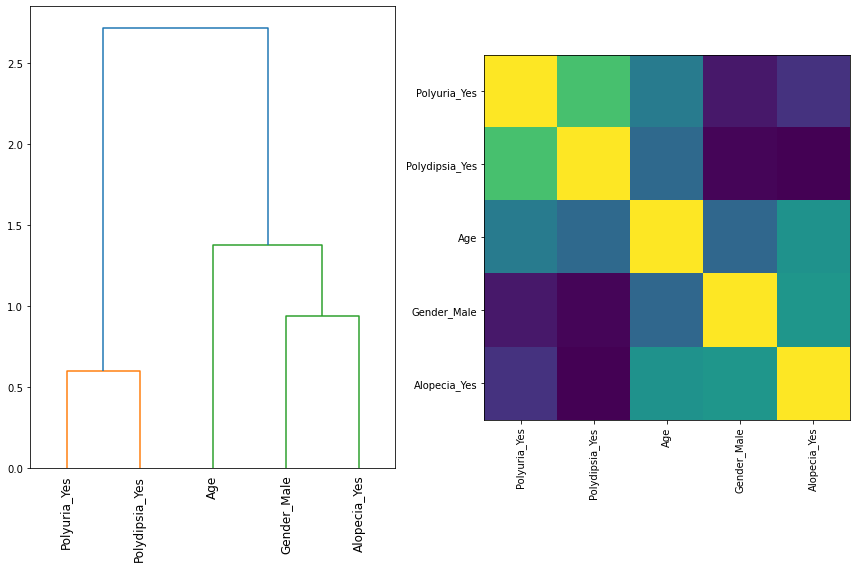

In [155]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(
    corr_linkage, labels=X_train.columns.tolist(), ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()